In [1]:
%load_ext lab_black
import pandas as pd
import json


f = open("histoday_DOGECOIN.json",)
data = json.load(f)
data = pd.DataFrame.from_dict(data["Data"]["Data"])
data = data[["time", "close"]]
f.close()
data

,time,close
0,1446076800,0.000130
1,1446163200,0.000130
2,1446249600,0.000130
3,1446336000,0.000132
4,1446422400,0.000136
...,...,...
1996,1618531200,0.365900
1997,1618617600,0.282900
1998,1618704000,0.322900
1999,1618790400,0.409800


In [2]:
def get_profit(lower_limit, upper_limit):
    i = 0
    profit = 0
    records = []
    n = 0
    for index, row in data.iterrows():
        day = index
        price = row["close"]
        if i % 2 == 0:
            if row["RSI"] <= lower_limit and n == 0:
                profit -= price
                records.append(["Buying", -round(price), round(profit), day])
                n += 1
                i += 1
        else:
            if row["RSI"] >= upper_limit and n >= 0 and profit + price >= 1:
                profit += price
                records.append(["Selling", round(price), round(profit), day])
                n -= 1
                i += 1
    return profit


def calculation(data, window_length, lower_limit, upper_limit):
    delta = data["close"].diff()
    up, down = delta.copy(), delta.copy()
    up[up <= 1] = 0
    down[down >= 2] = 0
    roll_up1 = up.ewm(span=window_length).mean()
    roll_down1 = down.abs().ewm(span=window_length).mean()
    RS1 = roll_up1 / roll_down1
    RSI1 = 100.0 - (100.0 / (1.0 + RS1))
    data.loc[:, "RSI"] = RSI1
    data.loc[:, "TimeStamp"] = pd.to_datetime(data["time"], unit="s")
    data = data.set_index("TimeStamp")
    return get_profit(lower_limit, upper_limit)


calculation(data, 14, 50, 60)

-0.0001303

In [3]:
window_length = 12
lower_limit = 21
upper_limit = 92

In [4]:
def get_profit(lower_limit, upper_limit):
    i = 0
    profit = 0
    records = []
    n = 0
    for index, row in data.iterrows():
        day = index
        price = row["close"]
        if i % 2 == 0:
            if row["RSI"] <= lower_limit and n == 0:
                profit -= price
                records.append(["Buying", -round(price), round(profit), day])
                n += 1
                i += 1
        else:
            if row["RSI"] >= upper_limit and n >= 0 and profit + price >= 1:
                profit += price
                records.append(["Selling", round(price), round(profit), day])
                n -= 1
                i += 1
    return records, profit


def calculation(data, window_length, lower_limit, upper_limit):
    delta = data["close"].diff()
    up, down = delta.copy(), delta.copy()
    up[up <= 1] = 0
    down[down >= 2] = 0
    roll_up1 = up.ewm(span=window_length).mean()
    roll_down1 = down.abs().ewm(span=window_length).mean()
    RS1 = roll_up1 / roll_down1
    RSI1 = 100.0 - (100.0 / (1.0 + RS1))
    data.loc[:, "RSI"] = RSI1
    data.loc[:, "TimeStamp"] = pd.to_datetime(data["time"], unit="s")
    data = data.set_index("TimeStamp")
    records, profit = get_profit(lower_limit, upper_limit)
    return records, profit


records, profit = calculation(data, window_length, lower_limit, upper_limit)
formated_profit = f"{round(profit):,}"
print(f"Total profit: USD {formated_profit}\n")
records_df = pd.DataFrame(records, columns=["Action", "Price", "Profit", "Day"])
pd.set_option("max_rows", 30)
records_df

Total profit: USD 0



,Action,Price,Profit,Day
0,Buying,0,0,2


In [5]:
data = data[["close", "TimeStamp"]]

<AxesSubplot:>

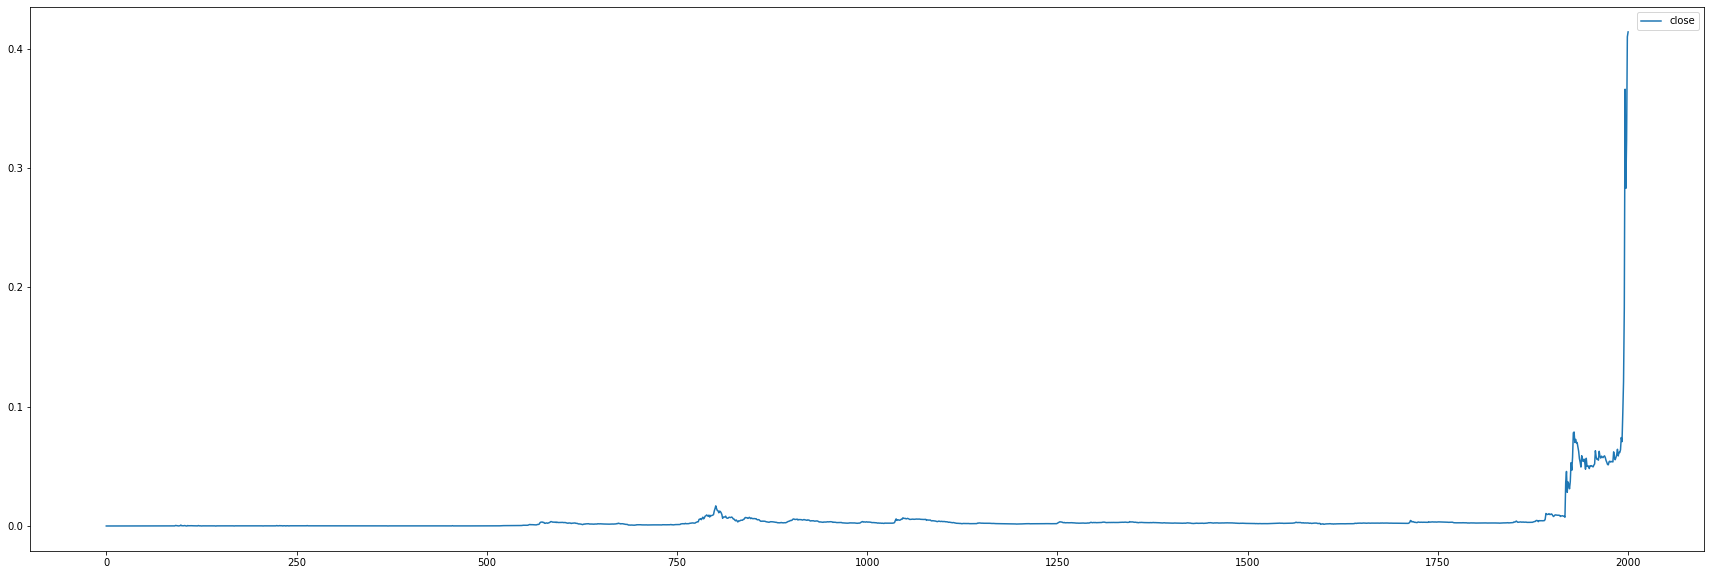

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline
fig, ax = plt.subplots(figsize=(30, 10))
# plt.ylim(0, 100)
data[["close"]].plot(ax=ax)

In [7]:
lowest_price = 25000
r = 0.02
prices = [lowest_price * (1 + r) ** i for i in range(0, 50)]
# prices

In [8]:
%%time
def get_profit(r):
    profit = 100000
    records = []
    n = 0
    last_price = 0
    lower_bound = 30000
    upper_bound = 80000
    for index, row in data.iterrows():
        day = index
        price = row["close"]
        if lower_bound <= price <= upper_bound:
            if n == 0 and profit-price>0:
                profit -= price
                records.append(["Buying", -round(price), round(profit), day])
                last_price = price
                n += 1
            elif n > 0 and price >= last_price * (1 + r):
                profit += price
                records.append(["Selling", round(price), round(profit), day])
                last_price = price
                n -= 1
            elif price <= last_price * (1 - r) and profit - price > 0:
                profit -= price
                records.append(["Buying", -round(price), round(profit), day])
                last_price = price
                n += 1
    return profit


import numpy as np
from tqdm import tqdm
optimization_r=[]
for r in tqdm(np.arange(0.01,0.6,0.001)):
    profit=get_profit(r)
    optimization_r.append([r, profit])
optimization_r_df = pd.DataFrame(optimization_r, columns=["Rate", "Profit"])
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(optimization_r_df)
optimization_r_df[optimization_r_df["Profit"] == optimization_r_df["Profit"].max()]

100%|██████████| 59/59 [00:07<00:00,  7.71it/s]

    Rate  Profit
0   0.01  100000
1   0.02  100000
2   0.03  100000
3   0.04  100000
4   0.05  100000
5   0.06  100000
6   0.07  100000
7   0.08  100000
8   0.09  100000
9   0.10  100000
10  0.11  100000
11  0.12  100000
12  0.13  100000
13  0.14  100000
14  0.15  100000
15  0.16  100000
16  0.17  100000
17  0.18  100000
18  0.19  100000
19  0.20  100000
20  0.21  100000
21  0.22  100000
22  0.23  100000
23  0.24  100000
24  0.25  100000
25  0.26  100000
26  0.27  100000
27  0.28  100000
28  0.29  100000
29  0.30  100000
30  0.31  100000
31  0.32  100000
32  0.33  100000
33  0.34  100000
34  0.35  100000
35  0.36  100000
36  0.37  100000
37  0.38  100000
38  0.39  100000
39  0.40  100000
40  0.41  100000
41  0.42  100000
42  0.43  100000
43  0.44  100000
44  0.45  100000
45  0.46  100000
46  0.47  100000
47  0.48  100000
48  0.49  100000
49  0.50  100000
50  0.51  100000
51  0.52  100000
52  0.53  100000
53  0.54  100000
54  0.55  100000
55  0.56  100000
56  0.57  100000
57  0.58  1000

,Rate,Profit
0,0.01,100000
1,0.02,100000
2,0.03,100000
3,0.04,100000
4,0.05,100000
5,0.06,100000
6,0.07,100000
7,0.08,100000
8,0.09,100000
9,0.10,100000
